In [1]:
import signal_processing, data_load, learn, evaluate, render

Using TensorFlow backend.


In [2]:
num_rows = 45
num_columns = 130
num_channels = 1

num_epochs = 100
num_batch_size = 13
num_speakers = 13
name1 = 'Adam_Driver'
name2 = 'Abigail_Breslin'
num_seconds = 3.0

In [3]:
featuresdf = data_load.make_dataframe_2speakers(num_speakers, './Dataset/wav/', num_rows, num_columns, num_seconds, name1, name2)

./Dataset/wav/id10001\1zcIwhmdeo4\00001.wav
./Dataset/wav/id10001\1zcIwhmdeo4\00002.wav
./Dataset/wav/id10001\1zcIwhmdeo4\00003.wav
./Dataset/wav/id10001\7gWzIy6yIIk\00001.wav
./Dataset/wav/id10001\7gWzIy6yIIk\00002.wav
./Dataset/wav/id10001\7gWzIy6yIIk\00003.wav
./Dataset/wav/id10001\7gWzIy6yIIk\00004.wav
./Dataset/wav/id10001\7w0IBEWc9Qw\00001.wav
./Dataset/wav/id10001\7w0IBEWc9Qw\00002.wav
./Dataset/wav/id10001\7w0IBEWc9Qw\00003.wav
./Dataset/wav/id10001\7w0IBEWc9Qw\00004.wav
./Dataset/wav/id10001\7w0IBEWc9Qw\00005.wav
./Dataset/wav/id10001\7w0IBEWc9Qw\00006.wav
./Dataset/wav/id10001\7w0IBEWc9Qw\00007.wav
./Dataset/wav/id10001\7w0IBEWc9Qw\00008.wav
./Dataset/wav/id10001\7w0IBEWc9Qw\00009.wav
./Dataset/wav/id10001\7w0IBEWc9Qw\00010.wav
./Dataset/wav/id10001\9mQ11vBs1wc\00001.wav
./Dataset/wav/id10001\9mQ11vBs1wc\00002.wav
./Dataset/wav/id10001\9mQ11vBs1wc\00003.wav
./Dataset/wav/id10001\9mQ11vBs1wc\00004.wav
./Dataset/wav/id10001\DtdEYdViWdw\00001.wav
./Dataset/wav/id10001\DtdEYdViWd

./Dataset/wav/id10007\10Oe0XETA0s\00002.wav
Yes
./Dataset/wav/id10007\10Oe0XETA0s\00003.wav
Yes
./Dataset/wav/id10007\10Oe0XETA0s\00004.wav
Yes
./Dataset/wav/id10007\5ExvrJyWpe8\00001.wav
Yes
./Dataset/wav/id10007\5ExvrJyWpe8\00002.wav
Yes
./Dataset/wav/id10007\5ExvrJyWpe8\00003.wav
Yes
./Dataset/wav/id10007\5ExvrJyWpe8\00004.wav
Yes
./Dataset/wav/id10007\5ExvrJyWpe8\00005.wav
Yes
./Dataset/wav/id10007\5ExvrJyWpe8\00006.wav
Yes
./Dataset/wav/id10007\CzQPAaPrC-E\00001.wav
Yes
./Dataset/wav/id10007\CzQPAaPrC-E\00002.wav
Yes
./Dataset/wav/id10007\CzQPAaPrC-E\00003.wav
Yes
./Dataset/wav/id10007\CzQPAaPrC-E\00004.wav
Yes
./Dataset/wav/id10007\CzQPAaPrC-E\00005.wav
Yes
./Dataset/wav/id10007\CzQPAaPrC-E\00006.wav
Yes
./Dataset/wav/id10007\CzQPAaPrC-E\00007.wav
Yes
./Dataset/wav/id10007\CzQPAaPrC-E\00008.wav
Yes
./Dataset/wav/id10007\CzQPAaPrC-E\00009.wav
Yes
./Dataset/wav/id10007\CzQPAaPrC-E\00010.wav
Yes
./Dataset/wav/id10007\CzQPAaPrC-E\00011.wav
Yes
./Dataset/wav/id10007\CzQPAaPrC-E\00012.

./Dataset/wav/id10012\0AXjxNXiEzo\00003.wav
Yes
./Dataset/wav/id10012\0AXjxNXiEzo\00004.wav
Yes
./Dataset/wav/id10012\0AXjxNXiEzo\00005.wav
Yes
./Dataset/wav/id10012\0AXjxNXiEzo\00006.wav
Yes
./Dataset/wav/id10012\0AXjxNXiEzo\00007.wav
Yes
./Dataset/wav/id10012\0AXjxNXiEzo\00008.wav
Yes
./Dataset/wav/id10012\0AXjxNXiEzo\00009.wav
Yes
./Dataset/wav/id10012\0AXjxNXiEzo\00010.wav
Yes
./Dataset/wav/id10012\0AXjxNXiEzo\00011.wav
Yes
./Dataset/wav/id10012\1miD-AWtXqk\00001.wav
Yes
./Dataset/wav/id10012\1miD-AWtXqk\00002.wav
Yes
./Dataset/wav/id10012\AStt8Tx-HXU\00001.wav
Yes
./Dataset/wav/id10012\AStt8Tx-HXU\00002.wav
Yes
./Dataset/wav/id10012\AStt8Tx-HXU\00003.wav
Yes
./Dataset/wav/id10012\AStt8Tx-HXU\00004.wav
Yes
./Dataset/wav/id10012\AStt8Tx-HXU\00005.wav
Yes
./Dataset/wav/id10012\AStt8Tx-HXU\00006.wav
Yes
./Dataset/wav/id10012\EHSEDnLxkC4\00001.wav
Yes
./Dataset/wav/id10012\EHSEDnLxkC4\00002.wav
Yes
./Dataset/wav/id10012\EHSEDnLxkC4\00003.wav
Yes
./Dataset/wav/id10012\EHSEDnLxkC4\00004.

In [4]:
result_sets = data_load.make_train_test_sets(featuresdf, num_rows, num_columns, num_channels)
num_labels = result_sets[4]
model = learn.build_CNN_model(num_rows, num_columns, num_labels)

In [5]:
learn.compile(model)

In [6]:
evaluate.evaluate_before_training(model, result_sets[0], result_sets[2])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 44, 129, 16)       80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 64, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 22, 64, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 63, 32)        2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 31, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 30, 64)         8

In [7]:
history = learn.train_model(model, result_sets, num_epochs, num_batch_size, 'CNNMFDiff', 'default', 'CNNMFDiff')

Train on 185 samples, validate on 47 samples
Epoch 1/100
182/185 [============================>.] - ETA: 0s - loss: 5.6042 - accuracy: 0.5879
Epoch 00001: val_loss improved from inf to 0.75884, saving model to saved_models/weights.best.CNNMFDiff.hdf5
185/185 [==============================] - 2s 10ms/sample - loss: 5.5134 - accuracy: 0.5946 - val_loss: 0.7588 - val_accuracy: 0.7660
Epoch 2/100
182/185 [============================>.] - ETA: 0s - loss: 1.5730 - accuracy: 0.6154
Epoch 00002: val_loss improved from 0.75884 to 0.18453, saving model to saved_models/weights.best.CNNMFDiff.hdf5
185/185 [==============================] - 1s 5ms/sample - loss: 1.5585 - accuracy: 0.6108 - val_loss: 0.1845 - val_accuracy: 0.8936
Epoch 3/100
182/185 [============================>.] - ETA: 0s - loss: 0.7317 - accuracy: 0.8077
Epoch 00003: val_loss improved from 0.18453 to 0.18351, saving model to saved_models/weights.best.CNNMFDiff.hdf5
185/185 [==============================] - 1s 5ms/sample - los

Epoch 27/100
182/185 [============================>.] - ETA: 0s - loss: 0.0305 - accuracy: 0.9890
Epoch 00027: val_loss improved from 0.04105 to 0.03981, saving model to saved_models/weights.best.CNNMFDiff.hdf5
185/185 [==============================] - 1s 5ms/sample - loss: 0.0300 - accuracy: 0.9892 - val_loss: 0.0398 - val_accuracy: 0.9787
Epoch 28/100
182/185 [============================>.] - ETA: 0s - loss: 0.0367 - accuracy: 0.9890
Epoch 00028: val_loss did not improve from 0.03981
185/185 [==============================] - 1s 5ms/sample - loss: 0.0361 - accuracy: 0.9892 - val_loss: 0.0537 - val_accuracy: 0.9787
Epoch 29/100
182/185 [============================>.] - ETA: 0s - loss: 0.0148 - accuracy: 0.9945
Epoch 00029: val_loss did not improve from 0.03981
185/185 [==============================] - 1s 5ms/sample - loss: 0.0145 - accuracy: 0.9946 - val_loss: 0.0797 - val_accuracy: 0.9787
Epoch 30/100
182/185 [============================>.] - ETA: 0s - loss: 0.0111 - accuracy: 0

Epoch 55/100
182/185 [============================>.] - ETA: 0s - loss: 9.4453e-04 - accuracy: 1.0000
Epoch 00055: val_loss did not improve from 0.01602
185/185 [==============================] - 1s 5ms/sample - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0319 - val_accuracy: 0.9787
Epoch 56/100
169/185 [==========================>...] - ETA: 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 00056: val_loss did not improve from 0.01602
185/185 [==============================] - 1s 5ms/sample - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0183 - val_accuracy: 0.9787
Epoch 57/100
182/185 [============================>.] - ETA: 0s - loss: 0.0024 - accuracy: 1.0000
Epoch 00057: val_loss did not improve from 0.01602
185/185 [==============================] - 1s 5ms/sample - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0261 - val_accuracy: 0.9787
Epoch 58/100
182/185 [============================>.] - ETA: 0s - loss: 2.6453e-04 - accuracy: 1.0000
Epoch 00058: val_loss did not improve from 0.016

182/185 [============================>.] - ETA: 0s - loss: 0.0019 - accuracy: 1.0000
Epoch 00083: val_loss did not improve from 0.01361
185/185 [==============================] - 1s 5ms/sample - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.1382 - val_accuracy: 0.9787
Epoch 84/100
182/185 [============================>.] - ETA: 0s - loss: 0.0321 - accuracy: 0.9890
Epoch 00084: val_loss improved from 0.01361 to 0.01291, saving model to saved_models/weights.best.CNNMFDiff.hdf5
185/185 [==============================] - 1s 5ms/sample - loss: 0.0316 - accuracy: 0.9892 - val_loss: 0.0129 - val_accuracy: 1.0000
Epoch 85/100
182/185 [============================>.] - ETA: 0s - loss: 0.0131 - accuracy: 0.9945
Epoch 00085: val_loss did not improve from 0.01291
185/185 [==============================] - 1s 5ms/sample - loss: 0.0129 - accuracy: 0.9946 - val_loss: 0.0138 - val_accuracy: 1.0000
Epoch 86/100
182/185 [============================>.] - ETA: 0s - loss: 0.0073 - accuracy: 1.0000
Epoch 0

In [8]:
evaluate.evaluate_model(model, 'CNNMFDiff', result_sets)

Training Accuracy:  1.0
Testing Accuracy:  1.0


In [9]:
evaluate.display_metrics(model, 'CNNMFDiff', result_sets)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        36

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47

Confusion matrix: 
[[11  0]
 [ 0 36]]


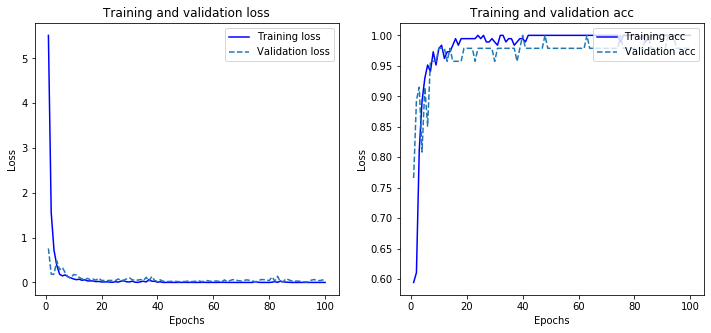

In [10]:
evaluate.plot_history(history)